In [74]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('train.csv')

In [76]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [77]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Implementing Machine Learning using Linear Regression (single input variable)

In [79]:
X = df['LotArea'].values
y = df['SalePrice'].values

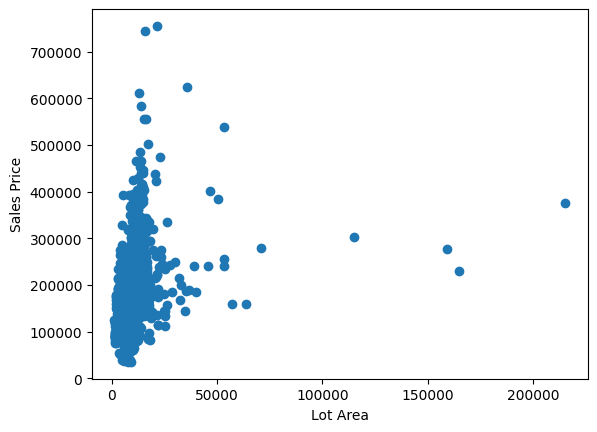

In [80]:
plt.scatter(X, y)
plt.xlabel('Lot Area')
plt.ylabel('Sales Price')
plt.show()

In [81]:
X = X.reshape(-1, 1)
X.shape

(1460, 1)

In [82]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)

In [83]:
linreg = LinearRegression()

In [84]:
cv_scores = cross_val_score(linreg, X, y, cv=kf)
cv_scores

array([ 0.06089564,  0.07068419,  0.0325173 ,  0.08930736, -0.11762295,
        0.09767718])

In [85]:
print(np.mean(cv_scores), np.std(cv_scores), np.quantile(cv_scores, [0.025, 0.975]))

0.038909786534715586 0.07306375664335375 [-0.09885542  0.09663095]


In [86]:
linreg.fit(X, y)

LinearRegression()

In [87]:
predictions = linreg.predict(X)

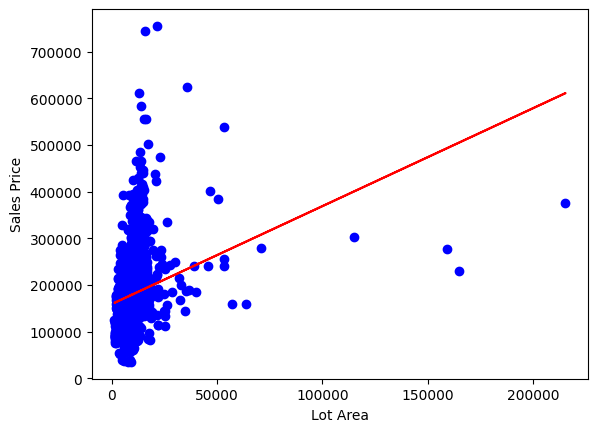

In [88]:
plt.scatter(X, y, color='blue')
plt.plot(X, predictions, color='red')
plt.xlabel('Lot Area')
plt.ylabel('Sales Price')
plt.show()

### Implementing Machine Learning using Linear Regression (multi input variable)

In [89]:
X = df[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF']].values
y = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred = linreg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [182433.91071866 265699.45926389], Actual Values: [154500 325000]


In [92]:
r_squared = linreg.score(X_test, y_test)
r_squared

0.7250804473882331

In [93]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

45920.83023276252

### Implementing Machine Learning with varying parameter values to evaluate best performance

In [94]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
train_accuracies = {}
test_accuracies = {}

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    train_accuracies[alpha] = ridge.score(X_train, y_train)
    test_accuracies[alpha] = ridge.score(X_test, y_test)
    
print(alphas, '\n', train_accuracies, '\n', test_accuracies)

[0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0] 
 {0.1: 0.6912867858982672, 1.0: 0.6912866558533277, 10.0: 0.6912738427977677, 100.0: 0.6901622620436803, 1000.0: 0.6506569728286986, 10000.0: 0.5215164301816215} 
 {0.1: 0.7250785254631689, 1.0: 0.725061153559422, 10.0: 0.7248801821759719, 100.0: 0.7224605934459576, 1000.0: 0.683986204588008, 10000.0: 0.5761563842136803}


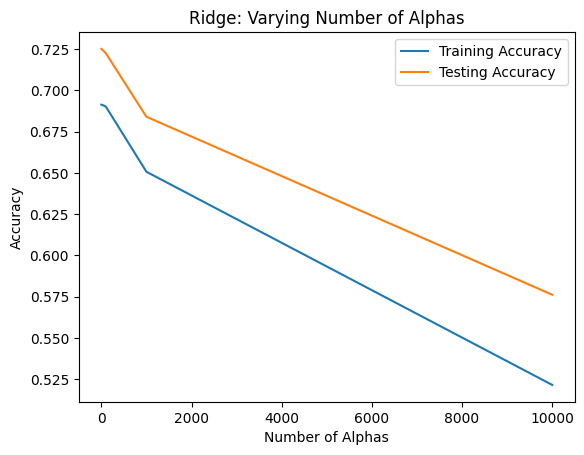

In [95]:
plt.title("Ridge: Varying Number of Alphas")
plt.plot(alphas, train_accuracies.values(), label='Training Accuracy')
plt.plot(alphas, test_accuracies.values(), label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Alphas')
plt.ylabel('Accuracy')
plt.show()

### Feature selection using Lasso

In [96]:
lasso = Lasso(alpha=0.3)
lasso.fit(X, y)

Lasso(alpha=0.3)

In [97]:
lasso_coef = lasso.coef_
lasso_coef

array([1.12894273e+00, 3.42883634e+04, 4.19766955e+03, 3.02492263e+02,
       3.99467398e+01])

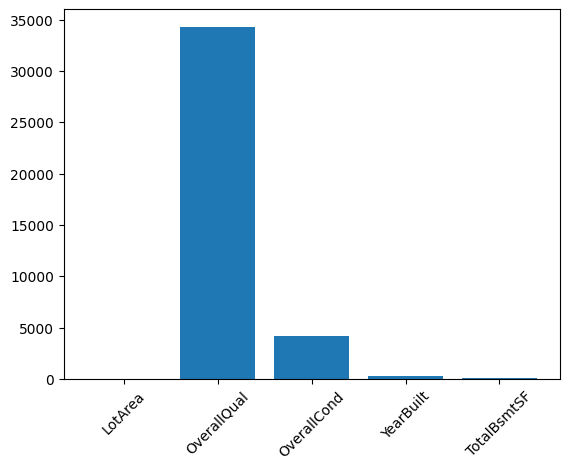

In [98]:
X_names = df[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF']].columns

plt.bar(X_names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

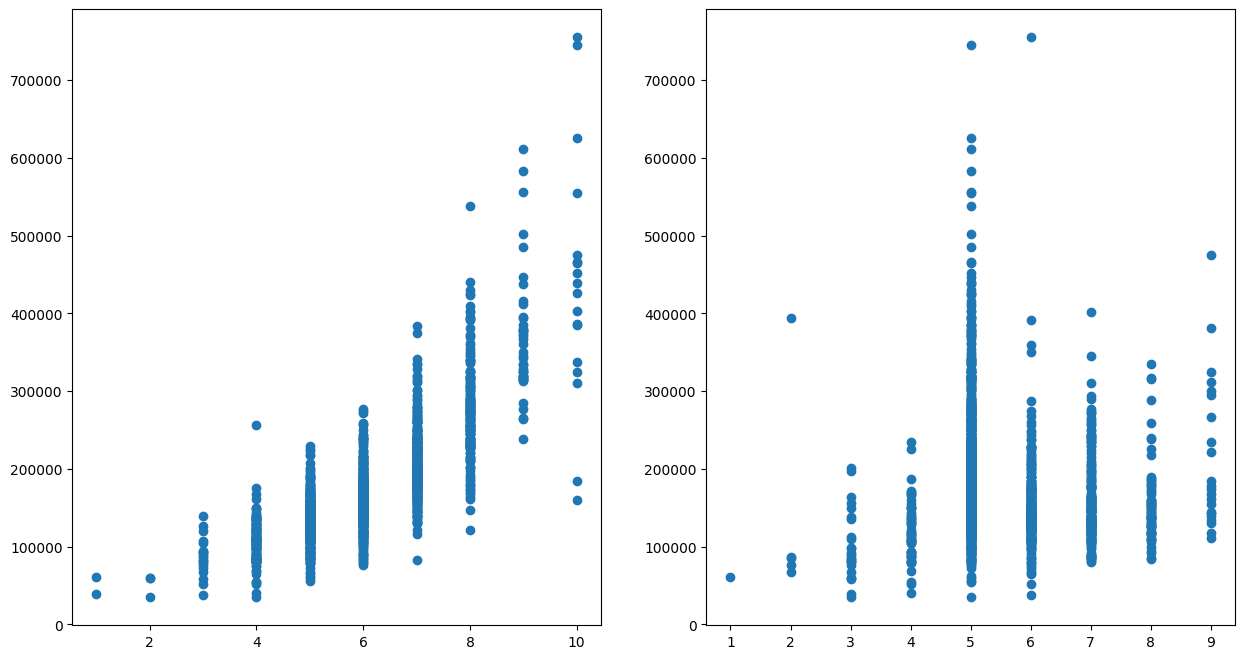

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
ax1.scatter(df.OverallQual, df.SalePrice)
ax2.scatter(df.OverallCond, df.SalePrice)
plt.show()

### Parameter Tuning

In [100]:
param_grid = {'alpha': np.linspace(0.00001, 1, 20)}
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

In [101]:
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.6772939895269775


### Regression with categorical features

In [102]:
input_features = df[['OverallQual', 'OverallCond', 'YearBuilt', 'SaleType', 'SaleCondition', 'SalePrice']]
input_features.head()

,OverallQual,OverallCond,YearBuilt,SaleType,SaleCondition,SalePrice
0,7,5,2003,WD,Normal,208500
1,6,8,1976,WD,Normal,181500
2,7,5,2001,WD,Normal,223500
3,7,5,1915,WD,Abnorml,140000
4,8,5,2000,WD,Normal,250000


In [103]:
input_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OverallQual    1460 non-null   int64 
 1   OverallCond    1460 non-null   int64 
 2   YearBuilt      1460 non-null   int64 
 3   SaleType       1460 non-null   object
 4   SaleCondition  1460 non-null   object
 5   SalePrice      1460 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


In [104]:
input_features.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [105]:
sale_type_dummies = pd.get_dummies(input_features['SaleType'])
sale_type_dummies.head()

,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1


In [106]:
input_features.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [107]:
sale_condition_dummies = pd.get_dummies(input_features['SaleCondition'])
sale_condition_dummies.head()

,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0


In [108]:
input_features = pd.concat([input_features, sale_type_dummies, sale_condition_dummies], axis=1)
input_features.head()

,OverallQual,OverallCond,YearBuilt,SaleType,SaleCondition,SalePrice,COD,CWD,Con,ConLD,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,7,5,2003,WD,Normal,208500,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,6,8,1976,WD,Normal,181500,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,7,5,2001,WD,Normal,223500,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,7,5,1915,WD,Abnorml,140000,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,8,5,2000,WD,Normal,250000,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [109]:
input_features = input_features.drop(['SaleType', 'SaleCondition'], axis=1)
input_features.head()

,OverallQual,OverallCond,YearBuilt,SalePrice,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,7,5,2003,208500,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,6,8,1976,181500,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,7,5,2001,223500,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,7,5,1915,140000,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,8,5,2000,250000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [110]:
X = input_features.drop('SalePrice', axis=1).values
y = input_features['SalePrice'].values

In [111]:
ridge = Ridge(alpha=0.2)

In [112]:
scores = cross_val_score(ridge, X, y, cv=kf, scoring='neg_mean_squared_error')
scores

array([-2.85030559e+09, -2.40586641e+09, -2.02164949e+09, -2.56950443e+09,
       -1.98760352e+09, -1.93715946e+09])

In [113]:
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 47781.10708435394
Standard Deviation of the target array: 79415.29188606751


### Dropping missing data / Pipelines / Standardization

In [114]:
input_features = df[['OverallQual', 'OverallCond', 'YearBuilt', 'LotFrontage', 'CentralAir', 'SalePrice']]
input_features.head()

,OverallQual,OverallCond,YearBuilt,LotFrontage,CentralAir,SalePrice
0,7,5,2003,65.0,Y,208500
1,6,8,1976,80.0,Y,181500
2,7,5,2001,68.0,Y,223500
3,7,5,1915,60.0,Y,140000
4,8,5,2000,84.0,Y,250000


In [115]:
input_features.isna().sum().sort_values()

OverallQual      0
OverallCond      0
YearBuilt        0
CentralAir       0
SalePrice        0
LotFrontage    259
dtype: int64

In [116]:
input_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1460 non-null   int64  
 1   OverallCond  1460 non-null   int64  
 2   YearBuilt    1460 non-null   int64  
 3   LotFrontage  1201 non-null   float64
 4   CentralAir   1460 non-null   object 
 5   SalePrice    1460 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 68.6+ KB


In [117]:
input_features.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [118]:
input_features['CentralAir'] = np.where(input_features['CentralAir'] == 'Y', 1, 0)
input_features.CentralAir.value_counts()

C:\Users\USER\AppData\Local\Temp\ipykernel_10244\4105223315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_features['CentralAir'] = np.where(input_features['CentralAir'] == 'Y', 1, 0)


1    1365
0      95
Name: CentralAir, dtype: int64

In [119]:
X = input_features.drop('SalePrice', axis=1).values
y = input_features['SalePrice'].values

In [120]:
imputer = SimpleImputer()
linreg = LinearRegression()
scaler = StandardScaler()

In [121]:
steps = [('imputer', imputer),
         ('scaler', scaler),
         ('linreg', linreg)]

In [122]:
pipeline = Pipeline(steps)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('linreg', LinearRegression())])

In [125]:
pipeline.score(X_test, y_test)

0.6916460444787764

In [126]:
y_pred = pipeline.predict(X_test)

In [127]:
print(y_pred[:5], y_test[:5])

[181012.46987656 273265.45615905 118623.13787544 163370.50766515
 311539.74825262] [154500 325000 115000 159000 315500]


### Parameter tuning with pipeline and scaling

In [129]:
imputer = SimpleImputer()
lasso = Lasso()
scaler = StandardScaler()

In [131]:
steps = [('imputer', imputer),
         ('scaler', scaler),
         ('lasso', lasso)]

In [132]:
pipeline = Pipeline(steps)

In [133]:
parameters = {"lasso__alpha": np.linspace(0.00001, 1.0, 20)}
cv = GridSearchCV(pipeline, parameters)
cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.00000000e-05, 5.26410526e-02, 1.05272105e-01, 1.57903158e-01,
       2.10534211e-01, 2.63165263e-01, 3.15796316e-01, 3.68427368e-01,
       4.21058421e-01, 4.73689474e-01, 5.26320526e-01, 5.78951579e-01,
       6.31582632e-01, 6.84213684e-01, 7.36844737e-01, 7.89475789e-01,
       8.42106842e-01, 8.94737895e-01, 9.47368947e-01, 1.00000000e+00])})

In [134]:
print("Tuned lasso paramaters: {}".format(cv.best_params_))
print("Tuned lasso score: {}".format(cv.best_score_))

Tuned lasso paramaters: {'lasso__alpha': 1.0}
Tuned lasso score: 0.6385455462707196


### Visualizing regression model performance

In [135]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

In [137]:
X = df[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF']].values
y = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

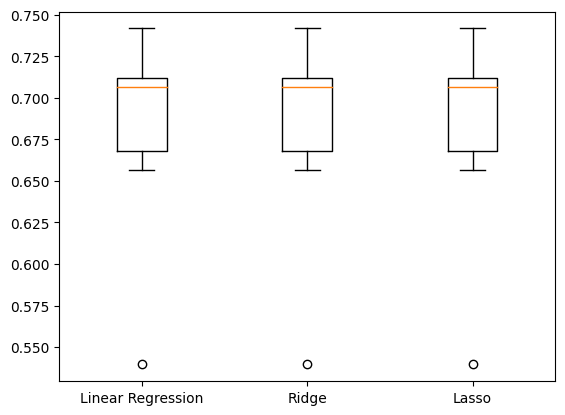

In [138]:
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_scores)
    
plt.boxplot(results, labels=models.keys())
plt.show()

In [139]:
scaler = StandardScaler()

In [143]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [144]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 45920.83023276319
Ridge Test Set RMSE: 45921.42262964222
Lasso Test Set RMSE: 45920.85912680285
